# 均匀噪声干扰

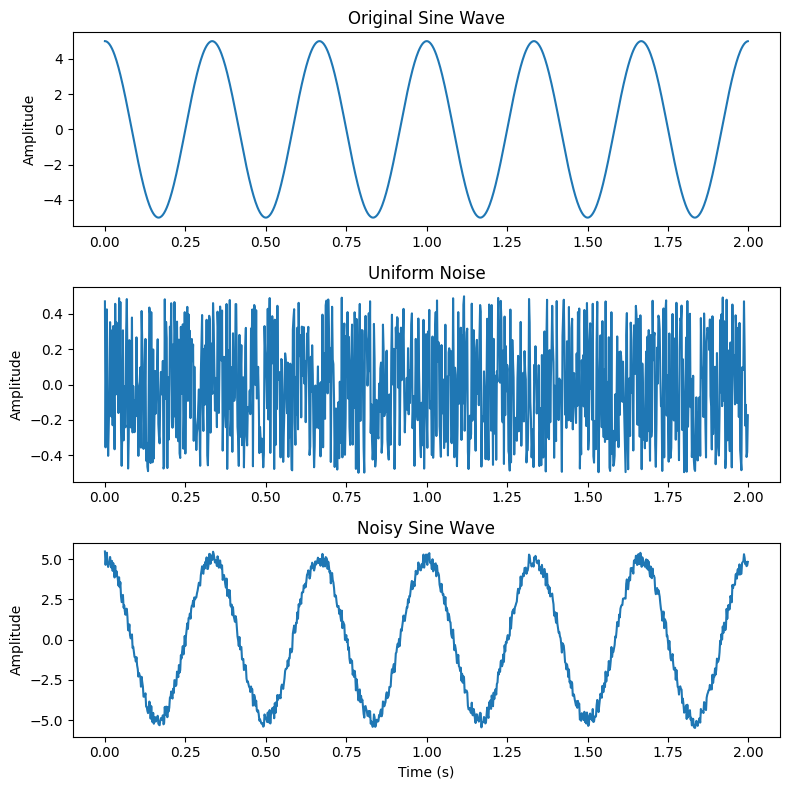

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

# 设置弦波参数
amplitude = 5.0
frequency = 3.0
duration = 2.0
sample_rate = 500

t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

# 生成原始弦波信号
original_wave = amplitude * np.cos(2 * np.pi * frequency * t)

# 生成均匀噪声
noise = random.uniform(-0.5, 0.5, len(t))

# 将噪声添加到弦波信号上
noisy_wave = original_wave + noise

fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# 原始弦波信号
axs[0].plot(t, original_wave)
axs[0].set_title('Original Sine Wave')
axs[0].set_ylabel('Amplitude')

# 均匀噪声
axs[1].plot(t, noise)
axs[1].set_title('Uniform Noise')
axs[1].set_ylabel('Amplitude')

# 加上均匀噪声后的弦波信号
axs[2].plot(t, noisy_wave)
axs[2].set_title('Noisy Sine Wave')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 高斯噪声

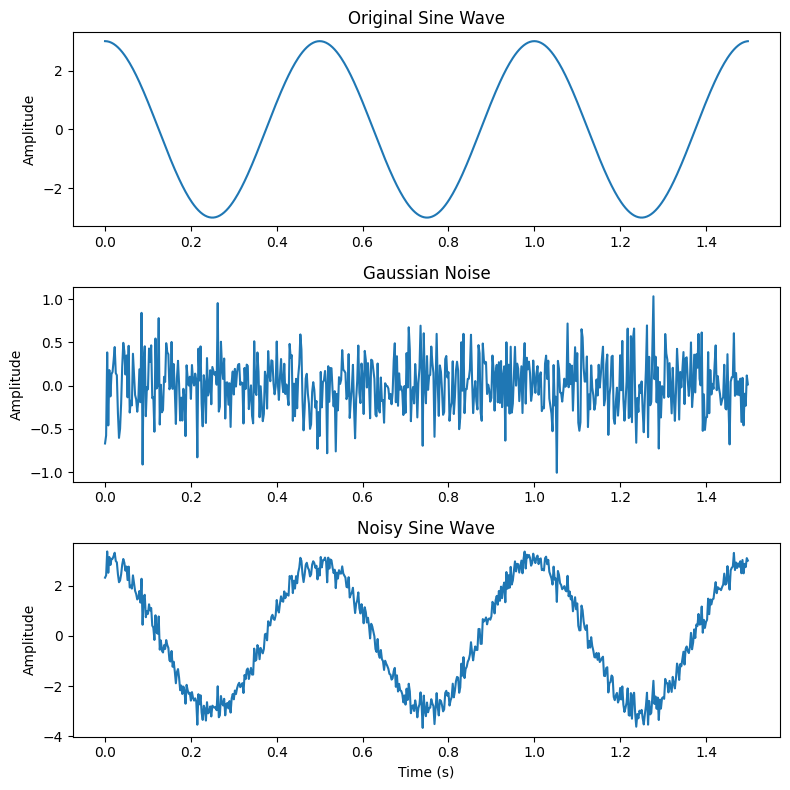

In [2]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

# 设置弦波参数
amplitude = 3.0
frequency = 2.0
duration = 1.5
sample_rate = 400

t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

# 生成原始弦波信号
original_wave = amplitude * np.cos(2 * np.pi * frequency * t)

# 生成高斯噪声
noise = random.normal(0, 0.3, len(t))

# 将噪声添加到弦波信号上
noisy_wave = original_wave + noise

fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# 原始弦波信号
axs[0].plot(t, original_wave)
axs[0].set_title('Original Sine Wave')
axs[0].set_ylabel('Amplitude')

# 高斯噪声
axs[1].plot(t, noise)
axs[1].set_title('Gaussian Noise')
axs[1].set_ylabel('Amplitude')

# 加上高斯噪声后的弦波信号
axs[2].plot(t, noisy_wave)
axs[2].set_title('Noisy Sine Wave')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 布朗尼噪声

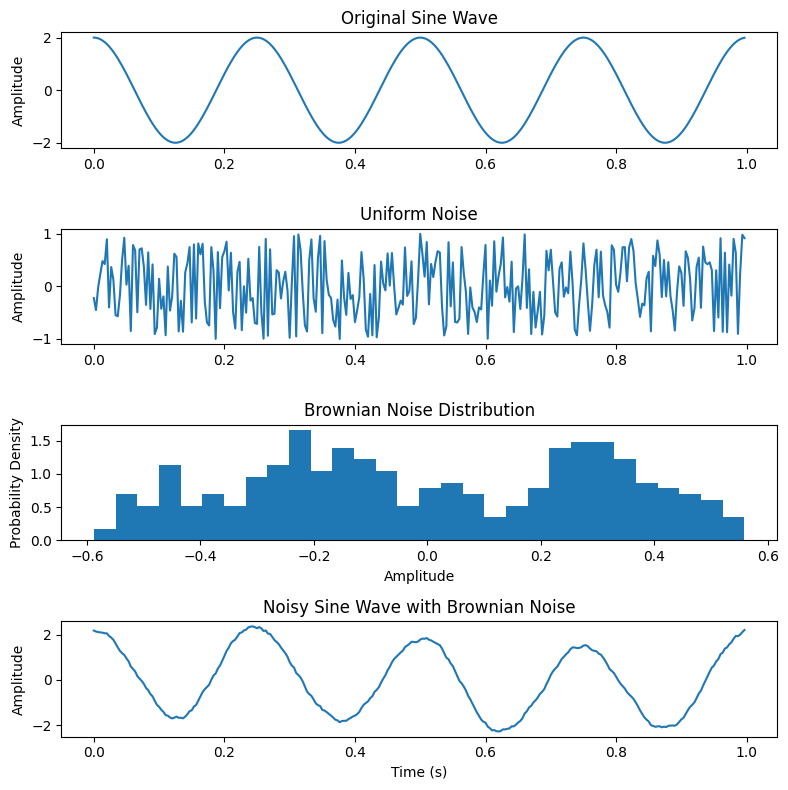

In [3]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

# 设置弦波参数
amplitude = 2.0
frequency = 4.0
duration = 1.0
sample_rate = 300

t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

# 生成原始弦波信号
original_wave = amplitude * np.cos(2 * np.pi * frequency * t)

# 生成均匀噪声（用于生成布朗尼噪声，增加幅度范围）
uniform_noise = random.uniform(-1, 1, len(t))

# 生成布朗尼噪声
brownian_noise = np.cumsum(uniform_noise)
brownian_noise = (brownian_noise - np.mean(brownian_noise)) / np.max(np.abs(brownian_noise)) * 0.8  # 适当调整缩放因子

# 将布朗尼噪声添加到弦波信号上
noisy_wave = original_wave + brownian_noise

fig, axs = plt.subplots(4, 1, figsize=(8, 8))

# 原始弦波信号
axs[0].plot(t, original_wave)
axs[0].set_title('Original Sine Wave')
axs[0].set_ylabel('Amplitude')

# 均匀噪声（用于对比布朗尼噪声）
axs[1].plot(t, uniform_noise)
axs[1].set_title('Uniform Noise')
axs[1].set_ylabel('Amplitude')

# 布朗尼噪声可视化
axs[2].hist(brownian_noise, bins=30, density=True)
axs[2].set_title('Brownian Noise Distribution')
axs[2].set_xlabel('Amplitude')
axs[2].set_ylabel('Probability Density')

# 加上布朗尼噪声后的弦波信号
axs[3].plot(t, noisy_wave)
axs[3].set_title('Noisy Sine Wave with Brownian Noise')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# 脉冲噪声

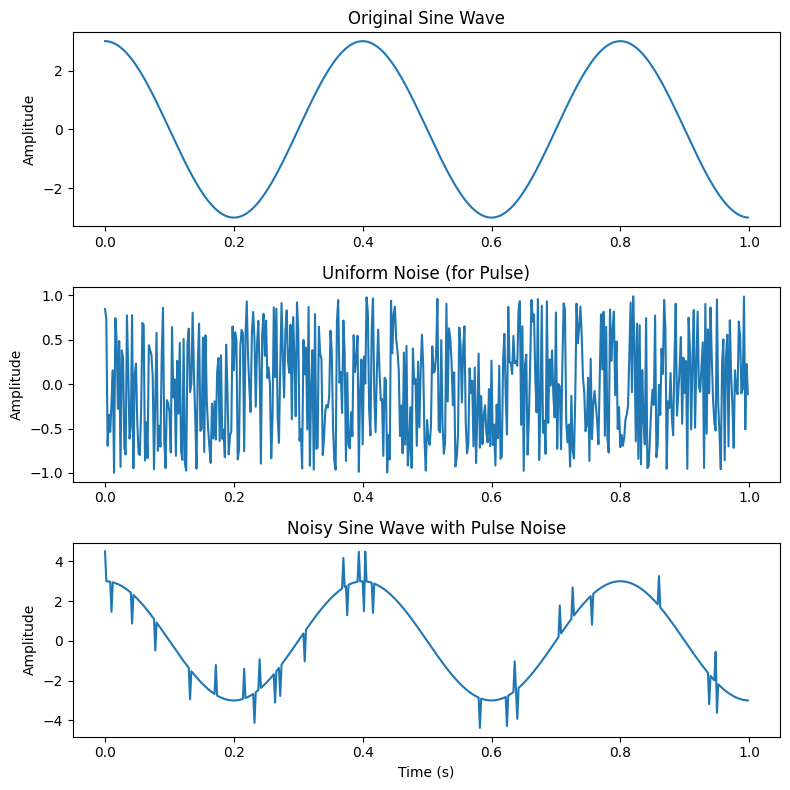

In [4]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

# 设置弦波参数
amplitude = 3.0
frequency = 2.5
duration = 1.0
sample_rate = 500

t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

# 生成原始弦波信号
original_wave = amplitude * np.cos(2 * np.pi * frequency * t)

# 生成脉冲噪声
pulse_noise = np.zeros(len(t))
pulse_amplitude = 1.5
pulse_probability = 0.05  # 5%的脉冲出现概率
for i in range(len(t)):
    if random.random() < pulse_probability:
        if random.random() < 0.5:
            pulse_noise[i] = pulse_amplitude
        else:
            pulse_noise[i] = -pulse_amplitude

# 将脉冲噪声添加到弦波信号上
noisy_wave = original_wave + pulse_noise

fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# 原始弦波信号
axs[0].plot(t, original_wave)
axs[0].set_title('Original Sine Wave')
axs[0].set_ylabel('Amplitude')

# 均匀噪声（用于对比脉冲噪声的生成过程）
axs[1].plot(t, random.uniform(-1, 1, len(t)))  # 这里绘制均匀噪声只是为了展示随机判断的基础，与脉冲噪声本身并无直接关系
axs[1].set_title('Uniform Noise (for Pulse)')
axs[1].set_ylabel('Amplitude')

# 加上脉冲噪声后的弦波信号
axs[2].plot(t, noisy_wave)
axs[2].set_title('Noisy Sine Wave with Pulse Noise')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 信号噪声比（SNR）

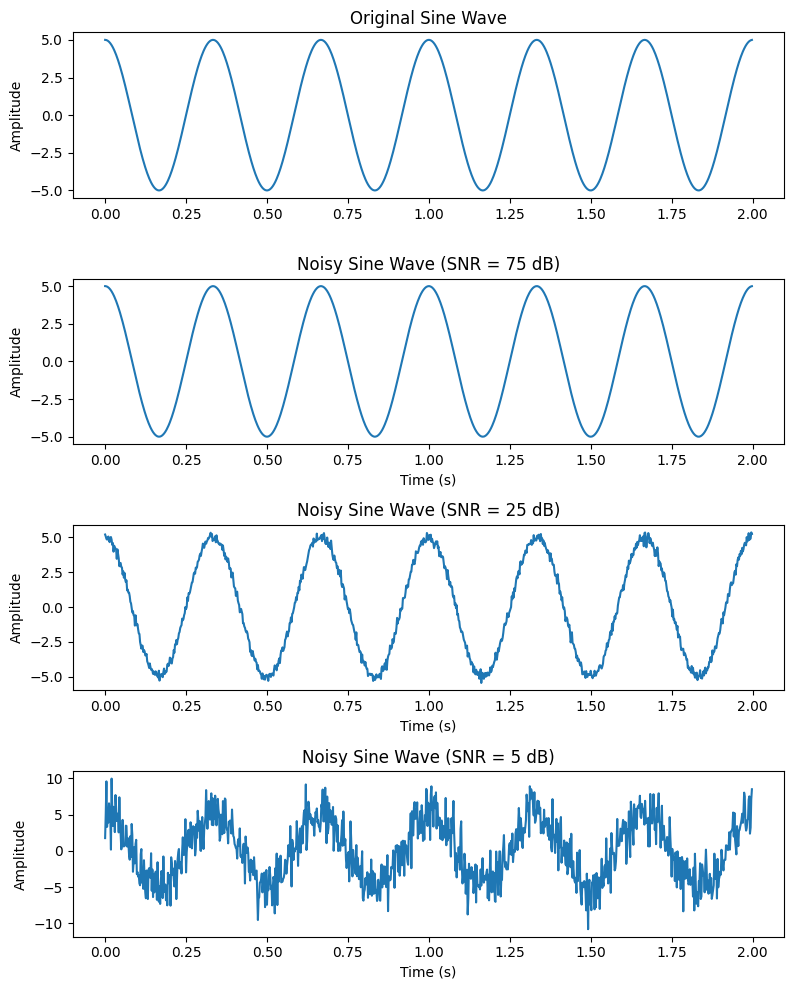

In [5]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

# 设置弦波参数
amplitude = 5.0
frequency = 3.0
duration = 2.0
sample_rate = 500

t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

# 生成原始弦波信号
original_wave = amplitude * np.cos(2 * np.pi * frequency * t)

# 计算原始信号功率
original_power = np.sum(original_wave ** 2) / len(original_wave)
SNRs = [75, 25, 5]  # 不同的信噪比（单位：dB）
noisy_waves = []
for snr in SNRs:
    # 根据信噪比计算噪声标准差
    noise_std = np.sqrt(original_power / (10 ** (snr / 10)))
    # 生成高斯噪声
    noise = random.normal(0, noise_std, len(t))
    # 将噪声添加到弦波信号
    noisy_wave = original_wave + noise
    noisy_waves.append(noisy_wave)

fig, axs = plt.subplots(4, 1, figsize=(8, 10))

# 绘制原始弦波信号
axs[0].plot(t, original_wave)
axs[0].set_title('Original Sine Wave')
axs[0].set_ylabel('Amplitude')

# 绘制不同信噪比下的带噪弦波信号
for i, noisy_wave in enumerate(noisy_waves):
    axs[i + 1].plot(t, noisy_wave)
    axs[i + 1].set_title(f'Noisy Sine Wave (SNR = {SNRs[i]} dB)')
    axs[i + 1].set_ylabel('Amplitude')
    axs[i + 1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()